In [1]:
!pip install tensorflow


Breast Cancer Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9737
Precision: 0.9857
Recall: 0.9718
F1 Score: 0.9787


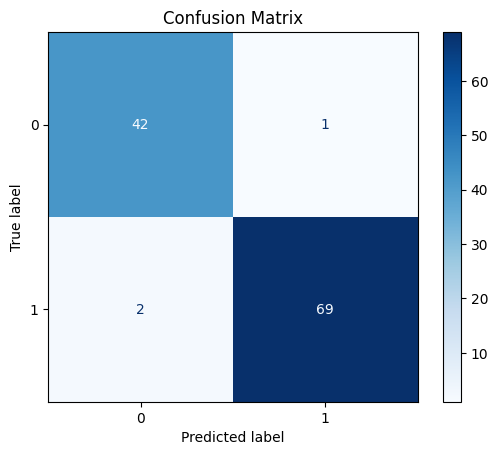

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Load and preprocess the Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Function to train and evaluate the MLP
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Scale training data
    X_test = scaler.transform(X_test)        # Scale testing data

    # Create MLP Classifier
    mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=100, activation='relu', random_state=42)
    mlp.fit(X_train, y_train)  # Train the model

    # Predictions
    y_pred = mlp.predict(X_test)  # Predict on the test set

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)  # Plot the confusion matrix
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate on Breast Cancer dataset
print("Breast Cancer Dataset:")
train_and_evaluate(X_cancer, y_cancer)
